,count,mean,std,min,25%,50%,75%,max
Premium Amount,1200000.0,1102.544822,864.998859,20.0,514.0,872.0,1509.0,4999.0


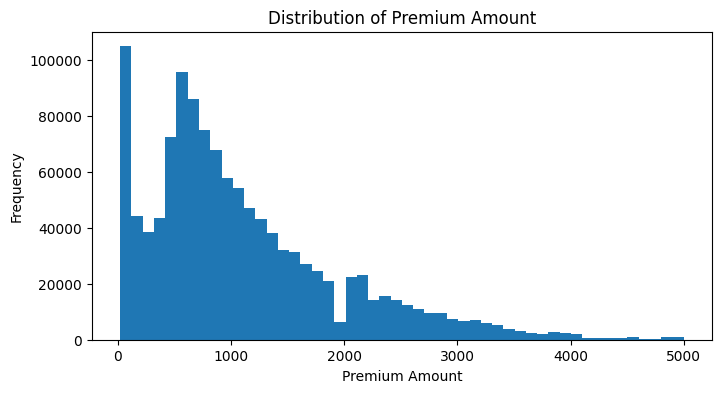

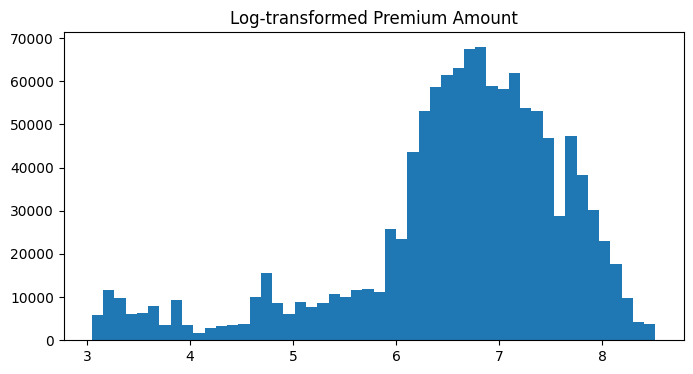

,corr_with_premium
Previous Claims,0.046874
Health Score,0.014704
Vehicle Age,0.000391
Insurance Duration,-0.000028
id,-0.000292
Number of Dependents,-0.000976
Age,-0.002430
Annual Income,-0.012390
Credit Score,-0.026014


,Policy Type,count
0,Premium,401846
1,Comprehensive,399600
2,Basic,398554


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display   # ← 이걸로 DataFrame을 예쁘게 보여줌
import numpy as np

# 0. 데이터 로드
df = pd.read_csv('train.csv')

# 1. Premium Amount 기술 통계
summary = df['Premium Amount'].describe().to_frame().T
display(summary)  # ace_tools 대신 display()

# 2. Premium Amount 분포 히스토그램
plt.figure(figsize=(8,4))
plt.hist(df['Premium Amount'], bins=50)
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.show()

# (선택) 치우침(skew) 완화를 위한 로그 변환
plt.figure(figsize=(8,4))
plt.hist(np.log1p(df['Premium Amount']), bins=50)
plt.title('Log-transformed Premium Amount')
plt.show()

# 3. 숫자형 피처와 Premium Amount 상관관계
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr = (df[numeric_cols]
        .corr()['Premium Amount']
        .drop('Premium Amount')
        .sort_values(ascending=False)
        .to_frame(name='corr_with_premium'))
display(corr)

# 4. Policy Type 분포
policy_counts = df['Policy Type'].value_counts().reset_index()
policy_counts.columns = ['Policy Type', 'count']
display(policy_counts)
